# Pure Python evaluation of vector norms

Generate a list of random floats of a given dimension (dim), and store its result in the variable `vec`.

In [1]:
# This is used for plots and numpy
%pylab inline 

#import random
dim = int(1000)
vec = [rand() for i in range(dim)]

Populating the interactive namespace from numpy and matplotlib


In [2]:
from numpy.testing import *

assert_equal(type(vec), list)
assert_equal(len(vec), dim)
for ob in vec:
    assert_equal(type(ob), float)

Write a function that evaluates the $l_p$ norm of a vector in $R^d$. We remind:
$$
\|v \|_{p} := \left(\sum_i (v_i)^p\right)^{1/p}
$$

the function should take as arguments a `list`, containing your $R^d$ vector, and a number `p` in the range $[1, \infty]$, indicating the exponent of the norm. 

**Note:** an infinite float number is given by `float("inf")`.

Throw an assertion (look it up on google!) if the exponent is not in the range you expect.

In [3]:
def p_norm(vector,p):
    assert (p >= 1), "Error. Exponent less than 1"
    if(p == float('inf')):
        max = 0.
        for el in vector:
            if max < abs(el):
                max = abs(el)
        return max
    part_sum = 0
    for v in vector:
        part_sum += v**p
    return part_sum**(1/p)

In [4]:
assert_equal(p_norm(range(10),1), 45.0)
assert_equal(p_norm([3,4], 2), 5.0)

In [5]:
assert_equal(p_norm([-1,-.5,.5], float("inf")), 1)

In [6]:
assert_raises(AssertionError, p_norm, [2,3], 0)
assert_raises(AssertionError, p_norm, [2,3], -1)

# Playing with condition numbers


In this exercise you will have to figure out what are the optimal
values of the stepping interval when approximating derivatives using
the finite difference method. See here_ for a short introduction on
how to run these programs on SISSA machines.

## 1. Finite differences
Write a program to compute the finite difference (`FD`)
approximation of the derivative of a function `f`, computed at
point `x`, using a stepping of size `h`. Recall the definition of
approximate derivative:

$$
FD(f,x,h) := \frac{f(x+h)-f(x)}{h}
$$

In [7]:
def FD(f, x, h):
       return ((f(x + h) - f(x)) / h)

In [8]:
assert_equal(FD(lambda x: x, 0, .125), 1.0)

## 2. Compute FD

Evaluate this function for the derivative of `sin(x)` evaluated at `x=1`, for values of `h` equal to `1e-i`, with `i=0,...,20`. Store the values of the finite differences in the list `fd1`.

In [9]:
x = 1
fd1 = []
for i in range(21):
    fd1.append( FD(sin, x, 10.**(-i)) )

In [10]:
assert_equal(len(fd1), 21)
expected = [0.06782644,0.49736375,0.53608598,0.53988148,0.54026023,0.5402981,0.54030189,0.54030226,0.5403023,0.54030236,0.54030225,0.54030114,0.54034555,0.53956839,0.54400928,0.55511151,0.,0.,0.,0.,0.]
assert_almost_equal(fd1,expected,decimal=8)

## 3. Error plots

Plot the error, defined as `abs(FD-cos(1.0))` where `FD` is your approximation, in `loglog` format and explain what you see. A good way to emphasize the result is to give the option `'-o'` to the plot command.

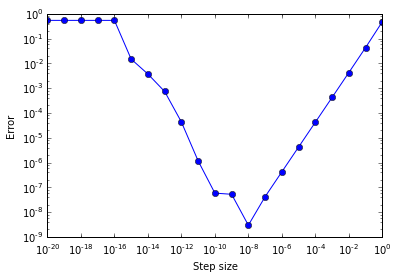

In [11]:
err = abs(array(fd1) - cos(1.))
step = array([10.**(-i) for i in range(21)])
loglog(step, err, '-o')
xlabel('Step size')
ylabel('Error')

For step size less than 1e-8 the value of sin(1. + h) is not represented with enough precision; this appens also because summing 1. and h we lost digits shifting the mantissa to perform the sum. Therefore, for step size less than 1e-8 the difference between approximation and exact solution grows, because the step size decreases. If the step size is too small (step size less than 1e-16) the value of 1. + h coincides with 1. and the FD function return zero, so the difference goes to one.

## 4. Error plots base 2
Repeate step 2 and 3 above, but using powers of `2` instead of powers of `10`, i.e., using `h` equal to `2**(-i)` for `i=1,...,60`. Do you see differences? How do you explain these differences? Shortly comment.  A good way to emphasize the result is to give the option `'-o'` to the plot command.

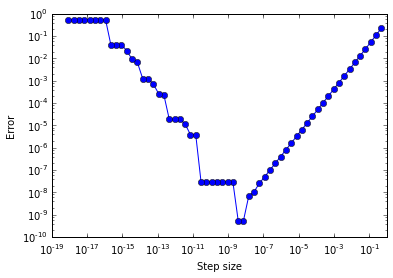

In [12]:
x = 1
fd1 = []

for i in range(1, 61):
    fd1.append( FD(sin, x, 2.**(-i)) )
    
err = abs(array(fd1) - cos(1.))
step = array([2.**(-i) for i in range(1, 61)])
loglog(step, err, '-o')#, basex=2)
xlabel('Step size')
ylabel('Error')

This plot is obtained employing powers of two within a range equal to the previous plot. The plot is more refined than the previous because we are using a greater number of points.

## 5. Central Finite Differences
Write a function that computes the central finite difference approximation (`CFD`), defined as 

$$
CFD(f,x,h) := \frac{f(x+h)-f(x-h)}{2h}
$$


In [13]:
def CFD(f, x, h):
    return ((f(x + h) - f(x - h)) / ( 2. * h ))

In [14]:
assert_equal(CFD(lambda x: x**2, 0.0, .5), 0.0)
assert_equal(CFD(lambda x: x**2, 1.0, .5), 2.0)

## 6. Error plots for CFD

Repeat steps 2., 3. and 4. and explain what you see. What is the *order* of the approximation 1. and what is the order of the approximation 5.? What's the order of the cancellation errors? 

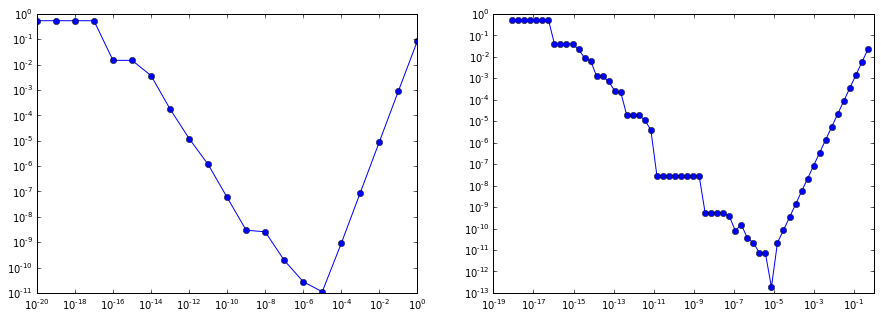

In [15]:
x = 1
fd1 = []
fd2 = []
for i in range(21):
    fd1.append( CFD(sin, x, 10.**(-i)) )   
err = abs(array(fd1) - cos(1.))
step = array([10.**(-i) for i in range(21)])

for i in range(1, 61):
    fd2.append( CFD(sin, x, 2.**(-i)) )

err2 = abs(array(fd2) - cos(1.))
step2 = array([2.**(-i) for i in range(1, 61)])

f, (ax1, ax2) = subplots(1, 2, figsize=(15, 5))
ax1.loglog(step, err, '-o')
ax2.loglog(step2, err2, '-o')#, basex=2)

With the CFD approximation the difference between approximation and true value decreases in the log-log graph with slope -2 (for h greater than 1e-5); instead, in the previous case (no CFD, only FD), the slope is -1. It means that in this case with decreasing of the step size, the error decreases with the square power of the step size. In this case the order of cancellation errors (the value of the step size for which the difference between the approximation and the exact value has a minimum) is 1.e-5, instead in the previous case is 1.e-8.

# Numpy

Numpy provides a very powerful array container. The first line of this ipython notebook has imported all of numpy functionalities in your notebook, just as if you typed::

    from numpy import *
    
Create a numpy array whith entries that range form 0 to 64. Use the correct numpy function to do so. Call it `x`. 

In [16]:
x = arange(0., 64., 1.)

In [17]:
assert_equal(type(x), ndarray)
assert_equal(len(x), 64)
for i in range(64): #xrange(64): #in Python3.x xrange function is not defined
    assert_equal(x[i], float(i))

Reshape the one dimensional array, to become a 4 rows 2 dimensional array, let numpy evaluate the correct number of culumns. Call it `y`.

In [18]:
y = x.reshape((4, -1))

In [19]:
assert_equal(shape(y), (4,16))

Get the following *slices* of `y`:

* All the rows and the first three colums. Name it `sl1`.
* All the colums and the first three rows. Name it `sl2`.
* Third to sixth (included) rows and all the colums. Name it `sl3`.
* The last three columns and all the rows. Name it `sl4`.

In [20]:
sl1 = y[:,:3]
sl2 = y[:3,:]
sl3 = y[:,3:7]
sl4 = y[:,-3:]

In [21]:
assert_equal(sl1,[[0,1,2],[16,17,18],[32,33,34],[48,49,50]])
assert_equal(sl2,[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],[16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31],[32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47]])
assert_equal(sl3,[[3,4,5,6],[19,20,21,22],[35,36,37,38],[51,52,53,54]])
assert_equal(sl4,[[13,14,15],[29,30,31],[45,46,47],[61,62,63]])

Now reshape the array, as if you wanted to feed it to a fortran routine. Call it `z`.

In [22]:
z = reshape(x, (4,-1), order='F')
print(z)
print(z.shape)

[[  0.   4.   8.  12.  16.  20.  24.  28.  32.  36.  40.  44.  48.  52.
   56.  60.]
 [  1.   5.   9.  13.  17.  21.  25.  29.  33.  37.  41.  45.  49.  53.
   57.  61.]
 [  2.   6.  10.  14.  18.  22.  26.  30.  34.  38.  42.  46.  50.  54.
   58.  62.]
 [  3.   7.  11.  15.  19.  23.  27.  31.  35.  39.  43.  47.  51.  55.
   59.  63.]]
(4, 16)


Comment on the result, what has changed with respect to `y`? 

The matrix z is correctly written in column-major order with the desidered shape.

Set the fourth element of `x` to 666666, and print `x`, `y`, `z`. Comment on the result

In [23]:
x[4] = 66
print(x)
print(y)
print(z)

[  0.   1.   2.   3.  66.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.
  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.
  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.  57.  58.  59.
  60.  61.  62.  63.]
[[  0.   1.   2.   3.  66.   5.   6.   7.   8.   9.  10.  11.  12.  13.
   14.  15.]
 [ 16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.
   30.  31.]
 [ 32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.  45.
   46.  47.]
 [ 48.  49.  50.  51.  52.  53.  54.  55.  56.  57.  58.  59.  60.  61.
   62.  63.]]
[[  0.  66.   8.  12.  16.  20.  24.  28.  32.  36.  40.  44.  48.  52.
   56.  60.]
 [  1.   5.   9.  13.  17.  21.  25.  29.  33.  37.  41.  45.  49.  53.
   57.  61.]
 [  2.   6.  10.  14.  18.  22.  26.  30.  34.  38.  42.  46.  50.  54.
   58.  62.]
 [  3.   7.  11.  15.  19.  23.  27.  31.  35.  39.  43.  47.  51.  55.
   59.

Each array is changed because a numpy array is a pointer.

## Arrays and Matrices

Define 2 arrays, `A` of dimensions (2,3) and `B` of dimension (3,4).

* Perform the operation `C = A.dot(B)`. Comment the result, or the error you get.

In [24]:
A = np.arange(6).reshape(2,3)
B = np.arange(12).reshape(3,4)
C = A.dot(B)

In [25]:
assert_equal(A.shape,(2,3))
assert_equal(B.shape,(3,4))
assert_equal(C.shape,(2,4))
expected = sum(A[1,:]*B[:,2])
assert_equal(C[1,2],expected)

In C is correctly stored the product of the matrix multiplication between A and B

* Perform the operation `C = A*(B)`. Comment the result, or the error you get.

In [26]:
C = A*B

ValueError: operands could not be broadcast together with shapes (2,3) (3,4) 

This operation is not defined because Python try to broadcast the operands to perform an element by element operation.

 * Convert A and B, from arrays to matrices and perform `A*B`. Comment the result.

In [27]:
A = asmatrix(A)
B = asmatrix(B)
C = A*B

In [28]:
assert_equal(type(A),numpy.matrixlib.defmatrix.matrix)
assert_equal(type(B),numpy.matrixlib.defmatrix.matrix)
assert_equal(type(C),numpy.matrixlib.defmatrix.matrix)
assert_equal(A.shape,(2,3))
assert_equal(B.shape,(3,4))
assert_equal(C.shape,(2,4))
expected = sum(A[1,:]*B[:,2])
assert_equal(C[1,2],expected)

Since now A and B are "matrix" and not just array, now Python knows how to perform the operation that we want to do.

# Playing with polynomials

The polynomial `(1-x)^6` can be expanded to::
     
     x^6 - 6*x^5 + 15*x^4 - 20*x^3 + 15*x^2 - 6*x + 1

   The two forms above are equivalent from a mathematical point of
   view, but may yield different results in a computer machine.

   Compute and plot the values of this polynomial, using each of the
   two forms, for 101 equally spaced points in the interval
   `[0.995,1.005]`, i.e., with a spacing of 0.0001 (use linspace).
   
   Can you explain this behavior?


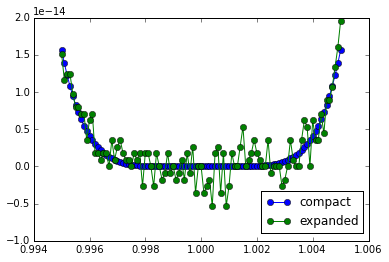

In [29]:
def compact(x):
    return (1. - x)**6
def full(x):
    return (x**6 - 6. * x**5 + 15. * x**4 - 20. * x**3 + 15 * x**2 - 6. * x + 1)

points = linspace(0.995, 1.005, 101)
comp = array([compact(x) for x in points])
ext = array([full(x) for x in points])

plot(points, comp, '-o', label = 'compact')
plot(points, ext, '-o', label = 'expanded')
plt.legend(bbox_to_anchor=(1, .25))

This behavior occurs because with the expanded form each operation (both sum and multiplication) increases the error on the final result: in each operation there is a loss of significant digits. Instead, with the compact form only two operations are performed.

**Playing with interpolation in python**

1. Given a set of $n+1$ points $x_i$ as input (either a list of floats, or a numpy array of floats), construct a function `lagrange_basis(xi,i,x)` that returns the $i$-th Lagrange
polynomial associated to $x_i$, evaluated at $x$. The $i$-th Lagrange polynomial is defined as polynomial of degree $n$ such that $l_i(x_j) = \delta_{ij}$, where $\delta$ is one if $i == j$ and zero otherwise.
   
Recall the mathematical definition of the $l_i(x)$ polynomials:

$$
l_i(x) := \prod_{j=0, j\neq i}^{n} \frac{x-x_j}{x_i-x_j}
$$


In [30]:
def lagrange_basis(xi, i, x):
    assert (i >= 0), "Error: index i out of bound"
    assert (i <= len(xi)), "Error: index i out of bound"
    f_eval = 1.
    j = 0
    for pt in xi:
        if i == j:
            partial_prod = 1.
        else:
            num = x - pt
            den = xi[i] - pt
            partial_prod = num / den
        j += 1
        f_eval *= partial_prod
    return f_eval
            

In [31]:
x = linspace(0,1,5)
d = 3
xi = linspace(0,1,d)

assert_equal(list(lagrange_basis(xi, 0, x)),[1.0, 0.375, -0.0, -0.125, 0.0])
assert_equal(list(lagrange_basis(xi, 1, x)),[0.0, 0.75, 1.0, 0.75, -0.0])
assert_equal(list(lagrange_basis(xi, 2, x)),[-0.0, -0.125, 0.0, 0.375, 1.0])

assert_raises(AssertionError, lagrange_basis, xi, -1, x)
assert_raises(AssertionError, lagrange_basis, xi, 10, x)

Construct the function `lagrange_interpolation(xi,g)` that, given the set of interpolation points `xi` and a function `g`, it returns **another function** that when evaluated at **x** returns the Lagrange interpolation polynomial of `g` defined as 

$$
 \mathcal{L} g(x) := \sum_{i=0}^n g(x_i) l_i(x)
$$

You could use this function as follows::

    Lg = lagrange_interpolation(xi, g)
    xi = linspace(0,1,101)
    plot(x, g(x))
    plot(x, Lg(x))
    plot(xi, g(xi), 'or')

In [32]:
def lagrange_interpolation(xi,f):
    def ret_f(points):
        i = 0
        inner_sum = 0.
        for pt in xi:
            inner_sum += f(pt) * lagrange_basis(xi, i, points)
            i += 1
        return inner_sum
    return ret_f

In [33]:
# Check for polynomials. This should be **exact**
g = lambda x: x**3+x**2

xi = linspace(0,1,4)
Lg = lagrange_interpolation(xi, g)

x = linspace(0,1,1001)

assert p_norm(g(x) - Lg(x),float('inf')) < 1e-15, 'This should be zero...'

## Runge counter example

Use the above functions to construct the Lagrange polynomial interpolation of the Runge function:

$$
g(x) := \frac{1}{1+(10x-5)^2}
$$

interpolated using `N` equispaced points between `0` and `1` included. 

Plot the result for N=5,10,15,20 and comment it.

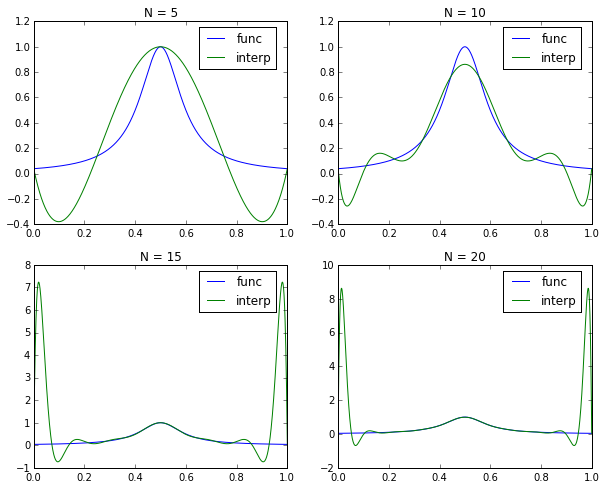

In [34]:
runge_func = lambda x: (1. + (10. * x - 5)**2)**(-1)

N = linspace(5, 20, 4, dtype=int)
x = linspace(0,1,1001)

# array-like subplot
f, plot_arr = subplots(2, 2, figsize = (10, 8))
i_plot = 0
j_plot = 0

for n in N:
    xi = linspace(0,1,n)
    Lg = lagrange_interpolation(xi, runge_func)
    plot_arr[i_plot, j_plot].plot(x, runge_func(x), label = 'func')
    plot_arr[i_plot, j_plot].plot(x, Lg(x), label = 'interp')
    plot_arr[i_plot, j_plot].set_title('N = %d' % n)
    plot_arr[i_plot, j_plot].legend(bbox_to_anchor=(.98, 1.))
    if j_plot == 0:
        j_plot = 1
    else:
        j_plot = 0
        i_plot=1

Increasing the number of interpolation points allow us to better approximate the function in the choosen interval. However, this also increase in an uncontrolled way the errors in the boundaries of the interval. This behaviour occurs because the interpolating polynomials can be positive or negative.